### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [49]:
# linear reggres
from sklearn.linear_model import LinearRegression

# model selection
from sklearn.model_selection import train_test_split 

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics         import mean_absolute_error, mean_squared_error
from sklearn.preprocessing   import StandardScaler, MinMaxScaler

# 평가지표
from sklearn.metrics         import mean_absolute_error, mean_squared_error

### load data

In [50]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

###  데이터 타입과 null 값 확인 및 전처리
- null 값이 많은 컬럼과 불필요하다고 생각되는 컬럼 삭제

1) train

In [51]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

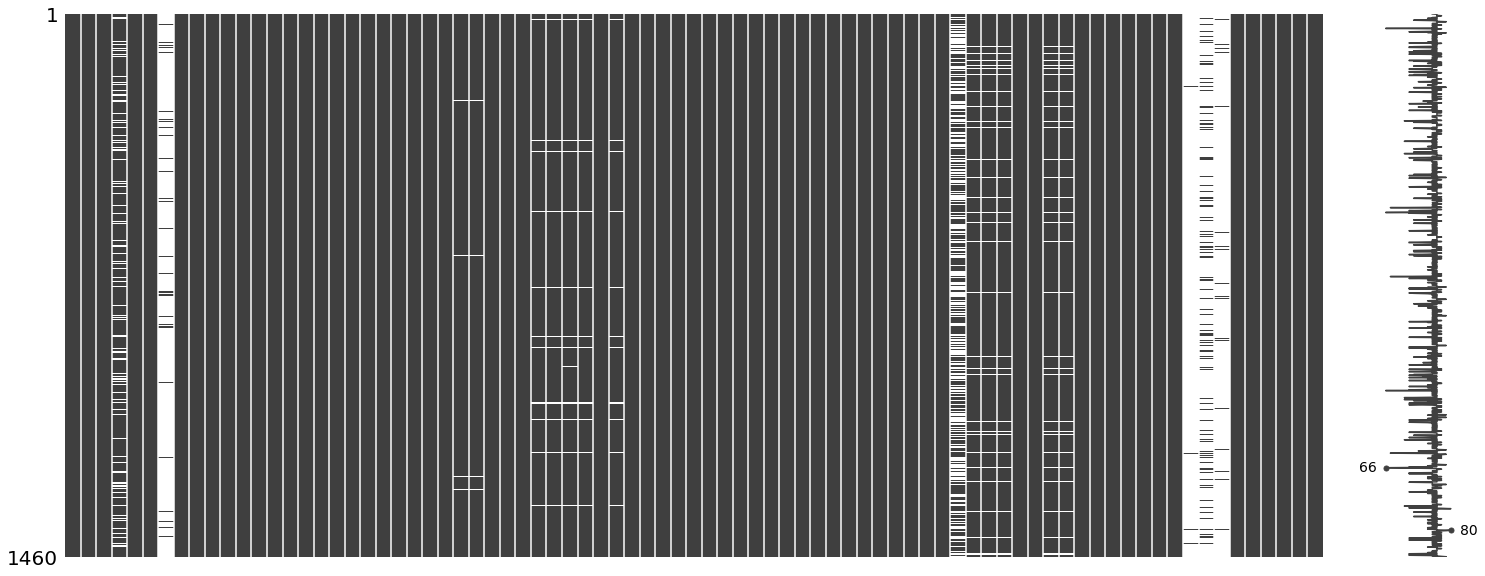

In [53]:
# 결측값 시각화
import missingno as msno

msno.matrix(train)

In [54]:
# 결측값 확인
train.isnull().sum()
series = train.isnull().sum()

In [55]:
series[series > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

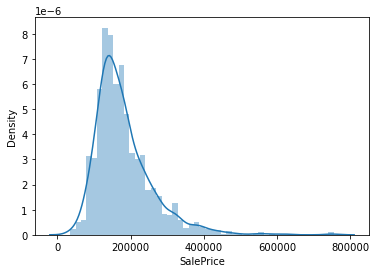

In [56]:
sns.distplot(train['SalePrice'])

In [57]:
# target scaling
# target --> log변환
log_target = np.log1p(train['SalePrice'])
log_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

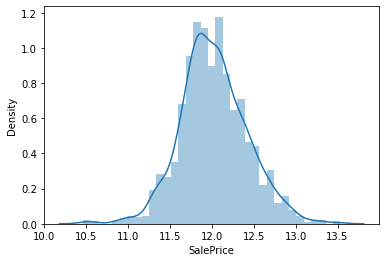

In [58]:
sns.distplot(log_target)

In [59]:
saleprice = train['SalePrice']
train['SalePrice'] = log_target
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [60]:
# null, type
null_cnt = train.isnull().sum()[train.isnull().sum() > 0]
print(null_cnt, null_cnt.index)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [61]:
# float64에 있는 null값들은 평균으로 대체하고 나머지는 drop
train.dtypes[null_cnt.index]

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [62]:
train.drop(['Id', 'Alley', 'MasVnrType', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'PoolQC', 'Fence','MiscFeature'], axis=1, inplace=True)

In [63]:
train.fillna(train.mean(), inplace=True)

In [64]:
# 전처리 결과
train.isnull().sum().sum()

0

In [65]:
# object 컬럼이 있으므로 OneHot Encoding
onehot_train = pd.get_dummies(train)
onehot_train.shape

(1460, 219)

### feature 스케일링 없이 모델생성, 학습, 예측, 평가

In [66]:
target = onehot_train['SalePrice']
features = onehot_train.drop('SalePrice', axis=1, inplace=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

price_model = LinearRegression()
price_model.fit(X_train, y_train)
y_pred = price_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R : ', price_model.score(features, target))

TypeError: Expected sequence or array-like, got <class 'NoneType'>

### feature 스케일링 후

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data

2) testDF

In [100]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:>

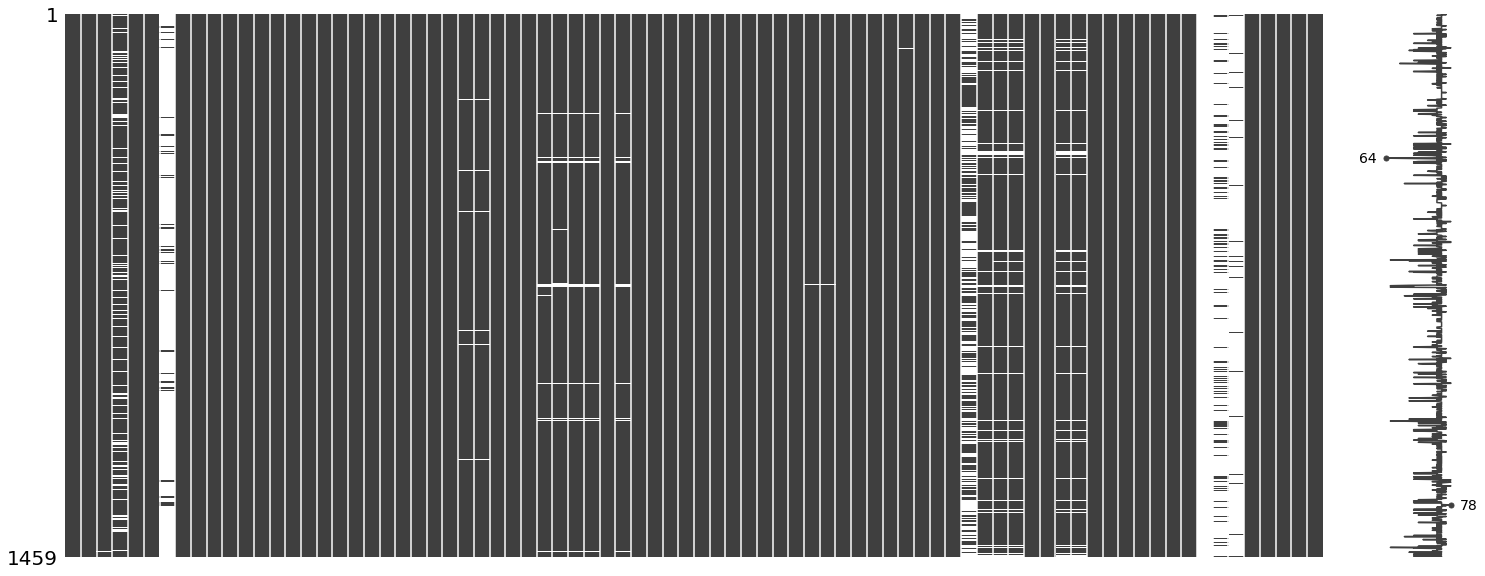

In [101]:
msno.matrix(testDF)

In [102]:
clean_testDF = testDF.drop(['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
                              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                              'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                              'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 
                              'LotFrontage', 'Id', 'MSZoning', 'Street', 'LotShape', 'LandContour',
                              'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'SaleType',
                              'SaleCondition', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                              'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','ExterQual',
                              'ExterCond', 'Foundation','CentralAir','Heating'], axis=1)
clean_testDF

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,Y,140,0,0,0,120,0,0,6,2010
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,Y,393,36,0,0,0,0,12500,6,2010
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,Y,212,34,0,0,0,0,0,3,2010
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,Y,360,36,0,0,0,0,0,6,2010
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,Y,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,Y,0,0,0,0,0,0,0,6,2006
1455,160,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,...,Y,0,24,0,0,0,0,0,4,2006
1456,20,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,...,Y,474,0,0,0,0,0,0,9,2006
1457,85,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,Y,80,32,0,0,0,0,700,7,2006


In [103]:
clean_testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   BsmtFinSF1     1458 non-null   float64
 7   BsmtFinSF2     1458 non-null   float64
 8   BsmtUnfSF      1458 non-null   float64
 9   TotalBsmtSF    1458 non-null   float64
 10  HeatingQC      1459 non-null   object 
 11  1stFlrSF       1459 non-null   int64  
 12  2ndFlrSF       1459 non-null   int64  
 13  LowQualFinSF   1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1457 non-null   float64
 16  BsmtHalfBath   1457 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

<AxesSubplot:>

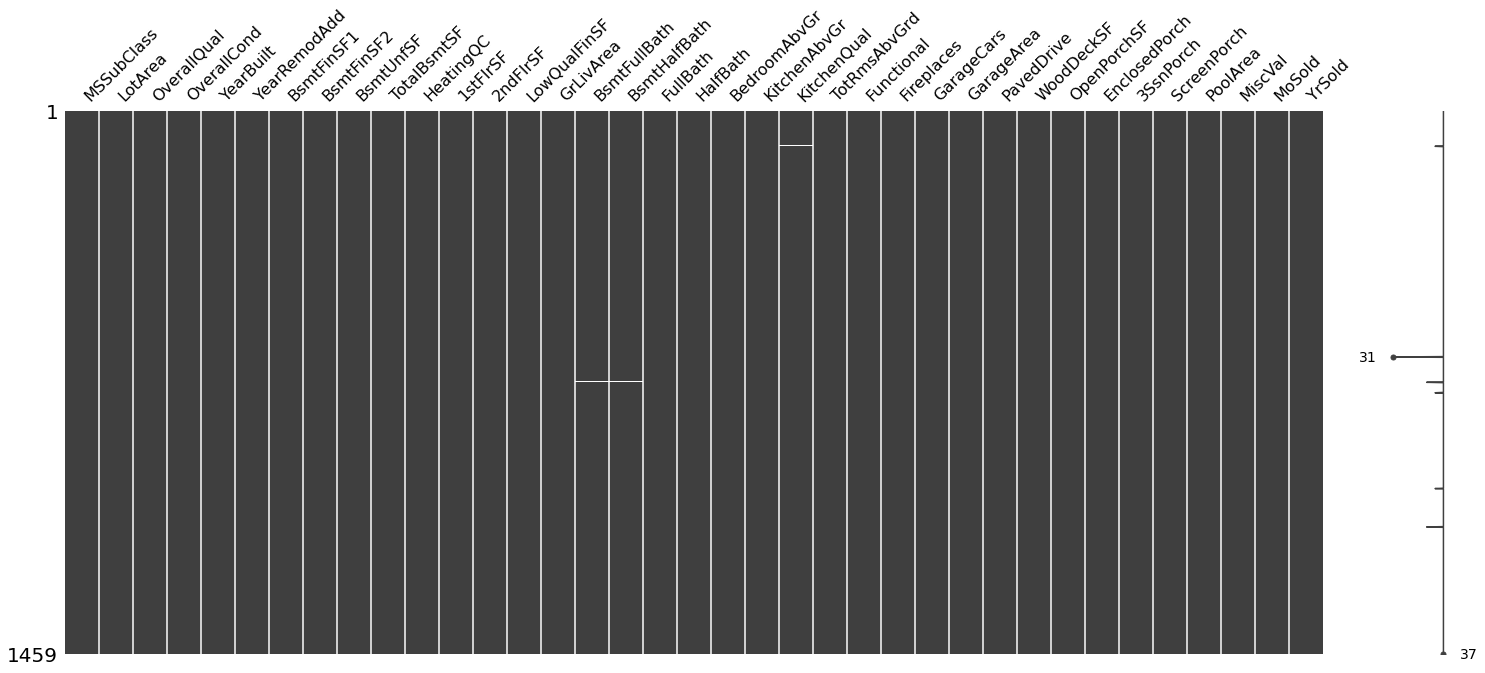

In [104]:
msno.matrix(clean_testDF)

###  drop 하지 않은 컬럼 중 숫자형 null 컬럼들은 평균값으로 대체

1) clean_trainDF

In [120]:
clean_trainDF = clean_trainDF.replace(0, clean_trainDF.mean())
clean_trainDF

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706.000000,46.549315,150.000000,856.0,...,94.244521,61.000000,21.95411,3.409589,15.060959,2.758904,43.489041,2,2008,208500
1,20,9600,6,8,1976,1976,978.000000,46.549315,284.000000,1262.0,...,298.000000,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,5,2007,181500
2,60,11250,7,5,2001,2002,486.000000,46.549315,434.000000,920.0,...,94.244521,42.000000,21.95411,3.409589,15.060959,2.758904,43.489041,9,2008,223500
3,70,9550,7,5,1915,1970,216.000000,46.549315,540.000000,756.0,...,94.244521,35.000000,272.00000,3.409589,15.060959,2.758904,43.489041,2,2006,140000
4,60,14260,8,5,2000,2000,655.000000,46.549315,490.000000,1145.0,...,192.000000,84.000000,21.95411,3.409589,15.060959,2.758904,43.489041,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,443.639726,46.549315,953.000000,953.0,...,94.244521,40.000000,21.95411,3.409589,15.060959,2.758904,43.489041,8,2007,175000
1456,20,13175,6,6,1978,1988,790.000000,163.000000,589.000000,1542.0,...,349.000000,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,2,2010,210000
1457,70,9042,7,9,1941,2006,275.000000,46.549315,877.000000,1152.0,...,94.244521,60.000000,21.95411,3.409589,15.060959,2.758904,2500.000000,5,2010,266500
1458,20,9717,5,6,1950,1996,49.000000,1029.000000,567.240411,1078.0,...,366.000000,46.660274,112.00000,3.409589,15.060959,2.758904,43.489041,4,2010,142125


2) clean_testDF

In [121]:
clean_testDF = clean_testDF.replace(0, clean_testDF.mean())
clean_testDF

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,11622,5,6,1961,1961,468.000000,144.000000,270.000000,882.0,...,Y,140.000000,48.313914,24.243317,1.79438,120.000000,1.744345,58.167923,6,2010
1,20,14267,6,6,1958,1958,923.000000,52.619342,406.000000,1329.0,...,Y,393.000000,36.000000,24.243317,1.79438,17.064428,1.744345,12500.000000,6,2010
2,60,13830,5,5,1997,1998,791.000000,52.619342,137.000000,928.0,...,Y,212.000000,34.000000,24.243317,1.79438,17.064428,1.744345,58.167923,3,2010
3,60,9978,6,6,1998,1998,602.000000,52.619342,324.000000,926.0,...,Y,360.000000,36.000000,24.243317,1.79438,17.064428,1.744345,58.167923,6,2010
4,120,5005,8,5,1992,1992,263.000000,52.619342,1017.000000,1280.0,...,Y,93.174777,82.000000,24.243317,1.79438,144.000000,1.744345,58.167923,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,439.203704,52.619342,546.000000,546.0,...,Y,93.174777,48.313914,24.243317,1.79438,17.064428,1.744345,58.167923,6,2006
1455,160,1894,4,5,1970,1970,252.000000,52.619342,294.000000,546.0,...,Y,93.174777,24.000000,24.243317,1.79438,17.064428,1.744345,58.167923,4,2006
1456,20,20000,5,7,1960,1996,1224.000000,52.619342,554.294925,1224.0,...,Y,474.000000,48.313914,24.243317,1.79438,17.064428,1.744345,58.167923,9,2006
1457,85,10441,5,5,1992,1992,337.000000,52.619342,575.000000,912.0,...,Y,80.000000,32.000000,24.243317,1.79438,17.064428,1.744345,700.000000,7,2006


### 타겟값 분포 확인 및 스케일링

In [83]:
# 상관관계 확인 --> 1이랑 가까울수록 관계가 깊음
# 주어진 문제에 대한 SalePrice의 상관관계 확인
clean_trainDF.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


### 학습 예측 평가 

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data

In [128]:
X = clean_trainDF['SalePrice']
Y = clean_trainDF['OverallQual']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R : ', lr_model.score(X,Y))

ValueError: Expected 2D array, got 1D array instead:
array=[220000 233230 154000 ... 318061 110000 269790].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.